**Food Recommendation System**

**Introduction**

This is a Machine Learning Food Recommendation System Based on Calories using the combination of Nearest Neighbours (NN),Linear Regression(LR) and Naive Bayes (NB) algorithms.

 Pandas library will be used for processing the data and scikit-learn for implementing the algorithms. the  dataset is the food dataset from food.com (recipies.csv).

The recommendation system combines the strengths of K-Nearest Neighbors (finding similar recipes based on food contents) and Logistic Regression and  Naive Bayes (suggesting low-calorie alternatives) to provide food recommendations for  individuals who are concious of their food intake and obese or overweight people based on their dietary preferences. It leverages the dataset's information to make informed suggestions for healthier food choices while considering the users' specific nutritional needs.

**How it works**

A user provides a barcode, the recommendation system uses K-Nearest Neighbors algorithm to find the recipe in the dataset that has the closest nutritional content to the provided food. The similarity between recipes is determined based on the feature values.

Once the nearest recipe is identified, the recommendation system uses Linear Regression and Naive Bayes to suggest a similar recipe with fewer calories. It predicts the target variable (calories) using the provided barcode data and looks for a recipe with a calorie content of less than 400.

**IMPLEMENTATION:**

**Data Collection:**

 The data from the dataset will be loaded into the pandas dataframe. This dataset contains information about various recipes, including their nutritional contents and calorie values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier



#import os
#from dotenv import load_dotenv

# Load environment variables from .env file
#load_dotenv()

# Get the CSV link from the environment variable
# csv_link = os.getenv("/content/recipes_full.csv")

# Load the dataset
df = pd.read_csv("/content/recipes_full.csv", low_memory=False)

df.head()

,RecipeId,Barcode,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,*38*,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,...,1.3,8,29.8,37.1,3.6,30.2,3.2,4,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,*39*,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,...,16.6,372.8,368.4,84.4,9,20.4,63.4,6,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,*40*,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,...,0,0,1.8,81.5,0.4,77.2,0.3,4,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,*41*,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,...,3.8,0,1558.6,64.2,17.3,32.1,29.3,2,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,*42*,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,...,0.1,0,959.3,25.1,4.8,17.7,4.3,4,NaN,"c(""Mix everything together and bring to a boil..."


**Data Cleaning:**

After loading the dataset, data cleaning was perfomred to handle missing values or incorrect data. Rows with missing values were removed.

In [2]:
# Confirm Columns
df.columns

Index(['RecipeId', 'Barcode', 'Name', 'AuthorId', 'AuthorName', 'CookTime',
       'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images',
       'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities',
       'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories',
       'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeYield',
       'RecipeInstructions'],
      dtype='object')

In [3]:
# Select necessary columns
df = df[['RecipeId', 'Barcode', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Calories',
       'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'DatePublished', 'RecipeInstructions', 'Images']]

df

,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
0,38,*38*,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,170.9,2.5,1.3,8,29.8,37.1,3.6,30.2,3.2,4,1999-08-09T21:46:00Z,"c(""Toss 2 cups berries with sugar."", ""Let stan...","c(""https://img.sndimg.com/food/image/upload/w_..."
1,39,*39*,Biryani,PT25M,PT4H,PT4H25M,1110.7,58.8,16.6,372.8,368.4,84.4,9,20.4,63.4,6,1999-08-29T13:12:00Z,"c(""Soak saffron in warm milk for 5 minutes and...","c(""https://img.sndimg.com/food/image/upload/w_..."
2,40,*40*,Best Lemonade,PT5M,PT30M,PT35M,311.1,0.2,0,0,1.8,81.5,0.4,77.2,0.3,4,1999-09-05T19:52:00Z,"c(""Into a 1 quart Jar with tight fitting lid, ...","c(""https://img.sndimg.com/food/image/upload/w_..."
3,41,*41*,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,536.1,24,3.8,0,1558.6,64.2,17.3,32.1,29.3,2,1999-09-03T14:54:00Z,"c(""Drain the tofu, carefully squeezing out exc...","c(""https://img.sndimg.com/food/image/upload/w_..."
4,42,*42*,Cabbage Soup,PT30M,PT20M,PT50M,103.6,0.4,0.1,0,959.3,25.1,4.8,17.7,4.3,4,1999-09-19T06:19:00Z,"c(""Mix everything together and bring to a boil...","""https://img.sndimg.com/food/image/upload/w_55..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522563,541379,*541379*,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8,2020-12-22T15:27:00Z,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",character(0)
522564,541380,*541380*,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,2063.4,172.4,71.4,433.8,766.3,3.2,0.7,0.1,117,8,2020-12-22T15:32:00Z,"c(""Position rack in center of oven and preheat...","""https://img.sndimg.com/food/image/upload/w_55..."
522565,541381,*541381*,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,1271.3,117.2,72.6,470.9,192.5,33.9,0,17.3,12.8,6,2020-12-22T15:33:00Z,"c(""heat half and half and heavy cream to a sim...",character(0)
522566,541382,*541382*,Quick & Easy Asian Cucumber Salmon Rolls,NaN,PT15M,PT15M,16.1,0.6,0.1,2.9,100.5,0.3,0,0.1,2.4,NaN,2020-12-22T22:11:00Z,"c(""In a small bowl, combine mayo and wasabi pa...","""https://img.sndimg.com/food/image/upload/w_55..."


In [4]:
# Select necessary columns
df = df[['RecipeId', 'Barcode', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Calories',
       'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'DatePublished', 'RecipeInstructions', 'Images']]

df

,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
0,38,*38*,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,170.9,2.5,1.3,8,29.8,37.1,3.6,30.2,3.2,4,1999-08-09T21:46:00Z,"c(""Toss 2 cups berries with sugar."", ""Let stan...","c(""https://img.sndimg.com/food/image/upload/w_..."
1,39,*39*,Biryani,PT25M,PT4H,PT4H25M,1110.7,58.8,16.6,372.8,368.4,84.4,9,20.4,63.4,6,1999-08-29T13:12:00Z,"c(""Soak saffron in warm milk for 5 minutes and...","c(""https://img.sndimg.com/food/image/upload/w_..."
2,40,*40*,Best Lemonade,PT5M,PT30M,PT35M,311.1,0.2,0,0,1.8,81.5,0.4,77.2,0.3,4,1999-09-05T19:52:00Z,"c(""Into a 1 quart Jar with tight fitting lid, ...","c(""https://img.sndimg.com/food/image/upload/w_..."
3,41,*41*,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,536.1,24,3.8,0,1558.6,64.2,17.3,32.1,29.3,2,1999-09-03T14:54:00Z,"c(""Drain the tofu, carefully squeezing out exc...","c(""https://img.sndimg.com/food/image/upload/w_..."
4,42,*42*,Cabbage Soup,PT30M,PT20M,PT50M,103.6,0.4,0.1,0,959.3,25.1,4.8,17.7,4.3,4,1999-09-19T06:19:00Z,"c(""Mix everything together and bring to a boil...","""https://img.sndimg.com/food/image/upload/w_55..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522563,541379,*541379*,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8,2020-12-22T15:27:00Z,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",character(0)
522564,541380,*541380*,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,2063.4,172.4,71.4,433.8,766.3,3.2,0.7,0.1,117,8,2020-12-22T15:32:00Z,"c(""Position rack in center of oven and preheat...","""https://img.sndimg.com/food/image/upload/w_55..."
522565,541381,*541381*,Kirshwasser Ice Cream,PT3H,PT1H,PT4H,1271.3,117.2,72.6,470.9,192.5,33.9,0,17.3,12.8,6,2020-12-22T15:33:00Z,"c(""heat half and half and heavy cream to a sim...",character(0)
522566,541382,*541382*,Quick & Easy Asian Cucumber Salmon Rolls,NaN,PT15M,PT15M,16.1,0.6,0.1,2.9,100.5,0.3,0,0.1,2.4,NaN,2020-12-22T22:11:00Z,"c(""In a small bowl, combine mayo and wasabi pa...","""https://img.sndimg.com/food/image/upload/w_55..."


In [5]:
# Handle fields with null values
df[df.isnull().any(axis=1)]

,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
8,46,*46*,A Jad - Cucumber Pickle,NaN,PT25M,PT25M,4.3,0,0,0,0.7,1.1,0.2,0.2,0.1,NaN,1999-08-11T19:48:00Z,"c(""Slice the cucumber in four lengthwise, then...",character(0)
9,47,*47*,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,69,5.6,1.4,6.3,15,4.5,0.6,1.6,0.8,NaN,1999-09-07T09:01:00Z,"c(""Preheat oven to 350 degrees."", ""Cream butte...","c(""https://img.sndimg.com/food/image/upload/w_..."
10,48,*48*,Boston Cream Pie,NaN,PT2H15M,PT2H15M,688.2,36.4,12.9,105.9,722.3,84,1.6,46.2,8.8,8,1999-08-24T04:35:00Z,"c(""Beat egg whites until soft peaks form."", ""G...",character(0)
12,50,*50*,Biscotti Di Prato,PT50M,PT20M,PT1H10M,89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,NaN,1999-08-31T21:19:00Z,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...","""https://img.sndimg.com/food/image/upload/w_55..."
14,52,*52*,Cafe Cappuccino,NaN,PT5M,PT5M,62.2,0.1,0,1.3,36.6,12.8,0,11.8,2.7,18,1999-08-31T21:05:00Z,"c(""Stir ingredients together."", ""Process in a ...","c(""https://img.sndimg.com/food/image/upload/w_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522558,541374,*541374*,MaMa's Bean Salad,NaN,PT30M,PT30M,141.7,4,0.3,0,11.7,22.4,5.3,10,5.2,15,2020-12-21T16:36:00Z,"c(""Drain and rinse all the beans. (It is unnec...",character(0)
522560,541376,*541376*,Spanish Coffee with Tia Maria,NaN,PT10M,PT10M,84.3,2.1,1.2,6.8,15.7,16.6,0.4,15.4,0.6,1,2020-12-22T15:12:00Z,"c(""Cut a small slit in the lemon wedge and sli...","""https://img.sndimg.com/food/image/upload/w_55..."
522562,541378,*541378*,Meg's Pumpkin Spice Bread,PT45M,PT30M,PT1H15M,898.2,34.8,5.2,106.3,903.3,139,2.6,86.8,10.8,NaN,2020-12-22T15:26:00Z,"c(""Beat eggs, add oil, water, and pumpkin; mix...","""https://img.sndimg.com/food/image/upload/w_55..."
522566,541382,*541382*,Quick & Easy Asian Cucumber Salmon Rolls,NaN,PT15M,PT15M,16.1,0.6,0.1,2.9,100.5,0.3,0,0.1,2.4,NaN,2020-12-22T22:11:00Z,"c(""In a small bowl, combine mayo and wasabi pa...","""https://img.sndimg.com/food/image/upload/w_55..."


In [6]:
# Drop fields with NaN values
df = df.dropna()

df


,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
0,38,*38*,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,170.9,2.5,1.3,8,29.8,37.1,3.6,30.2,3.2,4,1999-08-09T21:46:00Z,"c(""Toss 2 cups berries with sugar."", ""Let stan...","c(""https://img.sndimg.com/food/image/upload/w_..."
1,39,*39*,Biryani,PT25M,PT4H,PT4H25M,1110.7,58.8,16.6,372.8,368.4,84.4,9,20.4,63.4,6,1999-08-29T13:12:00Z,"c(""Soak saffron in warm milk for 5 minutes and...","c(""https://img.sndimg.com/food/image/upload/w_..."
2,40,*40*,Best Lemonade,PT5M,PT30M,PT35M,311.1,0.2,0,0,1.8,81.5,0.4,77.2,0.3,4,1999-09-05T19:52:00Z,"c(""Into a 1 quart Jar with tight fitting lid, ...","c(""https://img.sndimg.com/food/image/upload/w_..."
3,41,*41*,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,536.1,24,3.8,0,1558.6,64.2,17.3,32.1,29.3,2,1999-09-03T14:54:00Z,"c(""Drain the tofu, carefully squeezing out exc...","c(""https://img.sndimg.com/food/image/upload/w_..."
4,42,*42*,Cabbage Soup,PT30M,PT20M,PT50M,103.6,0.4,0.1,0,959.3,25.1,4.8,17.7,4.3,4,1999-09-19T06:19:00Z,"c(""Mix everything together and bring to a boil...","""https://img.sndimg.com/food/image/upload/w_55..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522559,541375,*541375*,Amazing Ground Beef Stroganoff,PT20M,PT30M,PT50M,422.3,28.6,12.6,106,634.7,14.1,1.4,5.7,27.3,4,2020-12-21T16:37:00Z,"c(""Saute meat in a medium skillet until it los...",character(0)
522561,541377,*541377*,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,12,2020-12-22T15:12:00Z,"c(""Line bottom and sides of 5-quart oval slow ...",character(0)
522563,541379,*541379*,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8,2020-12-22T15:27:00Z,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak...",character(0)
522564,541380,*541380*,Roast Prime Rib au Poivre with Mixed Peppercorns,PT3H,PT30M,PT3H30M,2063.4,172.4,71.4,433.8,766.3,3.2,0.7,0.1,117,8,2020-12-22T15:32:00Z,"c(""Position rack in center of oven and preheat...","""https://img.sndimg.com/food/image/upload/w_55..."


In [7]:
# Check for missing data in the DataFrame
missing_data = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Data Count:")
print(missing_data)

Missing Data Count:
RecipeId               0
Barcode                0
Name                   0
CookTime               0
PrepTime               0
TotalTime              0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeServings         0
DatePublished          0
RecipeInstructions     0
Images                 0
dtype: int64


In [8]:
df.dtypes

RecipeId               object
Barcode                object
Name                   object
CookTime               object
PrepTime               object
TotalTime              object
Calories               object
FatContent             object
SaturatedFatContent    object
CholesterolContent     object
SodiumContent          object
CarbohydrateContent    object
FiberContent           object
SugarContent           object
ProteinContent         object
RecipeServings         object
DatePublished          object
RecipeInstructions     object
Images                 object
dtype: object

In [9]:
# Convert cook, prep, and total time to numeric values in minutes
df['CookTime'] = df['CookTime'].str.extract('(\d+)').astype(float) * 60
df['PrepTime'] = df['PrepTime'].str.extract('(\d+)').astype(float) * 60
df['TotalTime'] = df['TotalTime'].str.extract('(\d+)').astype(float) * 60

# Convert Barcode to digits
df['Barcode'] = df['Barcode'].str.extract('(\d+)').astype(int)
# Convert 'DatePublished' to datetime objects
df['DatePublished'] = pd.to_datetime(df['DatePublished'])
df["Calories"] = df["Calories"].astype(float)
df["FatContent"] = df["FatContent"].astype(float)
df["SaturatedFatContent"] = df["SaturatedFatContent"].astype(float)
df["CholesterolContent"] = df["CholesterolContent"].astype(float)
df["SodiumContent"] = df["SodiumContent"].astype(float)
df["CarbohydrateContent"] = df["CarbohydrateContent"].astype(float)
df["FiberContent"] = df["FiberContent"].astype(float)
df["SugarContent"] = df["SugarContent"].astype(float)
df["ProteinContent"] = df["ProteinContent"].astype(float)
df["RecipeInstructions"] = df["RecipeInstructions"].astype(str)
df["Images"] = df["Images"].astype(str)
# Remove extra quotes from the "Images" and "RecipeInstructions" column
df["RecipeInstructions"] = df["RecipeInstructions"].str.replace('"', '').str.replace("''", "'").str.replace("(", "").str.replace(")", "")
df["Images"] = df["Images"].str.replace('"', '').str.replace("''", "'").str.replace("(", "").str.replace(")", "")

<ipython-input-9-2d148035cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CookTime'] = df['CookTime'].str.extract('(\d+)').astype(float) * 60
<ipython-input-9-2d148035cd6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrepTime'] = df['PrepTime'].str.extract('(\d+)').astype(float) * 60
<ipython-input-9-2d148035cd6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [10]:
df.dtypes

RecipeId                            object
Barcode                              int64
Name                                object
CookTime                           float64
PrepTime                           float64
TotalTime                          float64
Calories                           float64
FatContent                         float64
SaturatedFatContent                float64
CholesterolContent                 float64
SodiumContent                      float64
CarbohydrateContent                float64
FiberContent                       float64
SugarContent                       float64
ProteinContent                     float64
RecipeServings                      object
DatePublished          datetime64[ns, UTC]
RecipeInstructions                  object
Images                              object
dtype: object

In [11]:
df

,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
0,38,38,Low-Fat Berry Blue Frozen Dessert,1440.0,2700.0,1440.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4,1999-08-09 21:46:00+00:00,"cToss 2 cups berries with sugar., Let stand fo...",chttps://img.sndimg.com/food/image/upload/w_55...
1,39,39,Biryani,1500.0,240.0,240.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6,1999-08-29 13:12:00+00:00,cSoak saffron in warm milk for 5 minutes and p...,chttps://img.sndimg.com/food/image/upload/w_55...
2,40,40,Best Lemonade,300.0,1800.0,2100.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4,1999-09-05 19:52:00+00:00,"cInto a 1 quart Jar with tight fitting lid, pu...",chttps://img.sndimg.com/food/image/upload/w_55...
3,41,41,Carina's Tofu-Vegetable Kebabs,1200.0,1440.0,1440.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2,1999-09-03 14:54:00+00:00,"cDrain the tofu, carefully squeezing out exces...",chttps://img.sndimg.com/food/image/upload/w_55...
4,42,42,Cabbage Soup,1800.0,1200.0,3000.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4,1999-09-19 06:19:00+00:00,"cMix everything together and bring to a boil.,...",https://img.sndimg.com/food/image/upload/w_555...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522559,541375,541375,Amazing Ground Beef Stroganoff,1200.0,1800.0,3000.0,422.3,28.6,12.6,106.0,634.7,14.1,1.4,5.7,27.3,4,2020-12-21 16:37:00+00:00,cSaute meat in a medium skillet until it loses...,character0
522561,541377,541377,Slow-Cooker Classic Coffee Cake,180.0,1200.0,180.0,358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,12,2020-12-22 15:12:00+00:00,cLine bottom and sides of 5-quart oval slow co...,character0
522563,541379,541379,Meg's Fresh Ginger Gingerbread,2100.0,60.0,60.0,316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8,2020-12-22 15:27:00+00:00,cPreheat oven to 350&deg;F Grease an 8x8 cake ...,character0
522564,541380,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,180.0,1800.0,180.0,2063.4,172.4,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8,2020-12-22 15:32:00+00:00,cPosition rack in center of oven and preheat t...,https://img.sndimg.com/food/image/upload/w_555...


**Exploring The Data**

The realtionship between the target variables and other variables was checked.

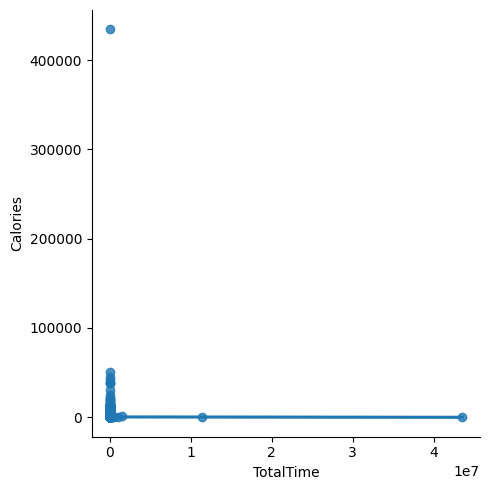

In [12]:
# Exploring how TotalTime relates to Calrories
sns.lmplot(x="TotalTime", y="Calories", data=df, fit_reg=True, ci=None)

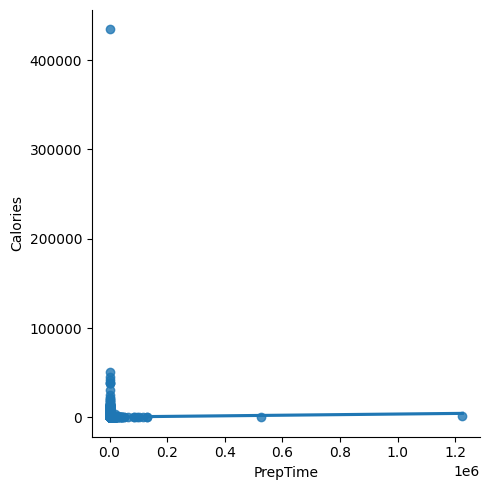

In [13]:
# Exploring how PrepTime relates to Calrories
sns.lmplot(x="PrepTime", y="Calories", data=df, fit_reg=True, ci=None)

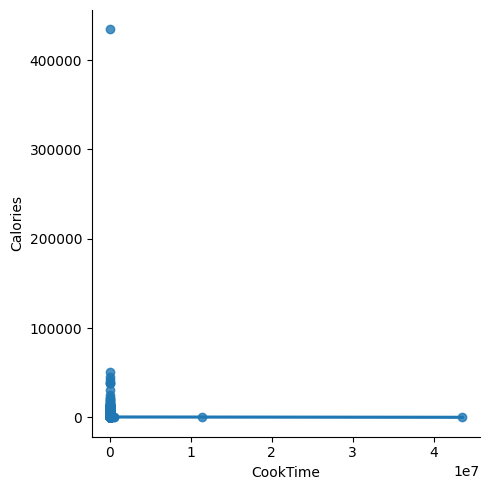

In [14]:
# Exploring how CookTime relates to Calrories
sns.lmplot(x="CookTime", y="Calories", data=df, fit_reg=True, ci=None)

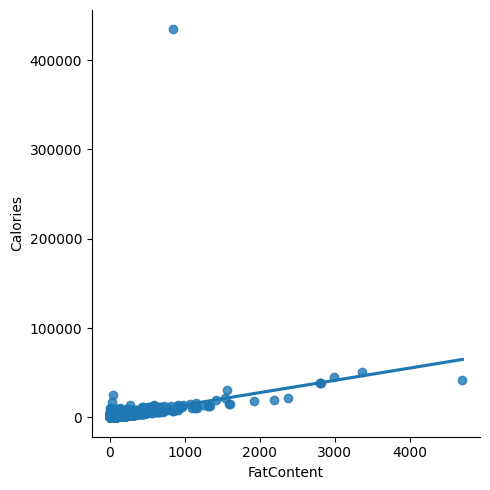

In [15]:
# Exploring how FatContent relates to Calrories
sns.lmplot(x="FatContent", y="Calories", data=df, fit_reg=True, ci=None)

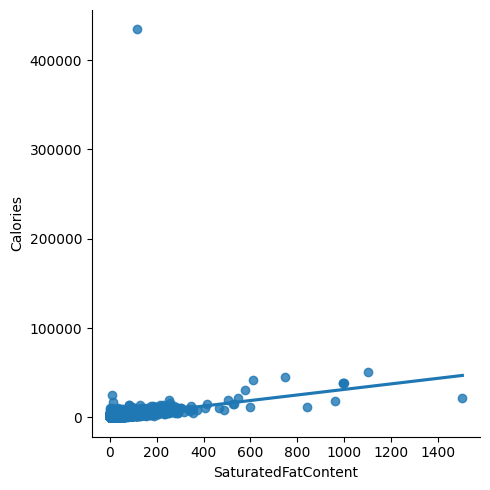

In [16]:
# Exploring how SaturatedFatContent relates to Calrories
sns.lmplot(x="SaturatedFatContent", y="Calories", data=df, fit_reg=True, ci=None)

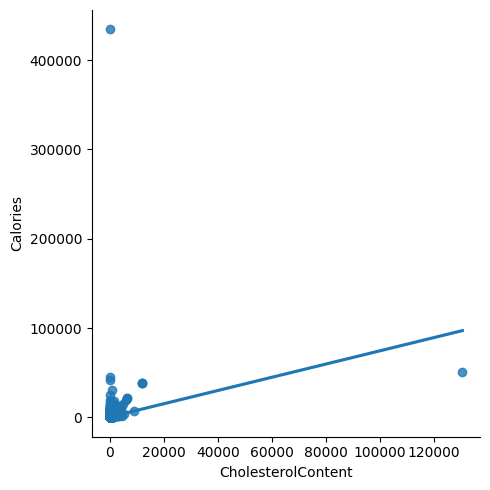

In [17]:
# Exploring how CholesterolContent relates to Calrories
sns.lmplot(x="CholesterolContent", y="Calories", data=df, fit_reg=True, ci=None)

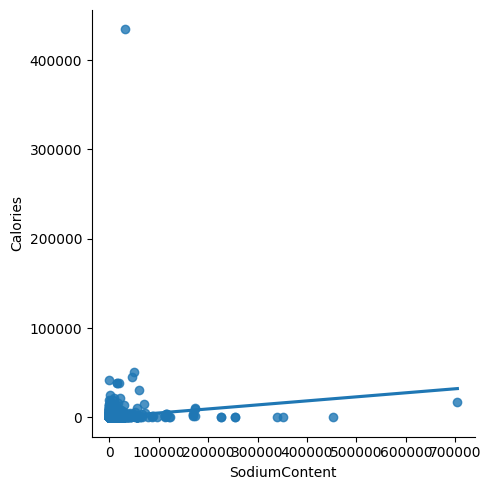

In [18]:
# Exploring how SodiumContent relates to Calrories
sns.lmplot(x="SodiumContent", y="Calories", data=df, fit_reg=True, ci=None)

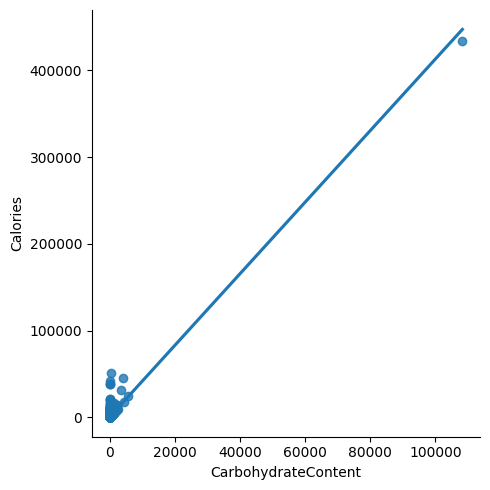

In [19]:
# Exploring how CarbohydrateContent relates to Calrories
sns.lmplot(x="CarbohydrateContent", y="Calories", data=df, fit_reg=True, ci=None)

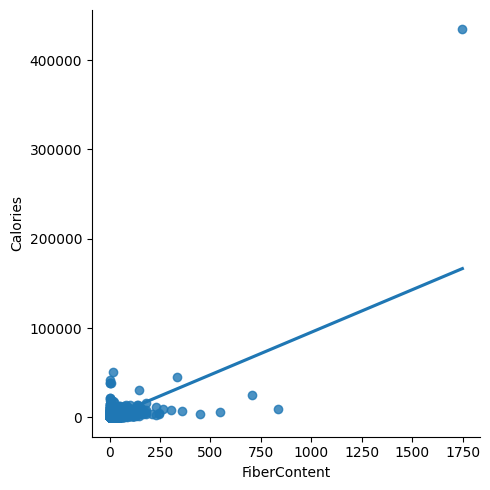

In [20]:
# Exploring how FiberContent relates to Calrories
sns.lmplot(x="FiberContent", y="Calories", data=df, fit_reg=True, ci=None)

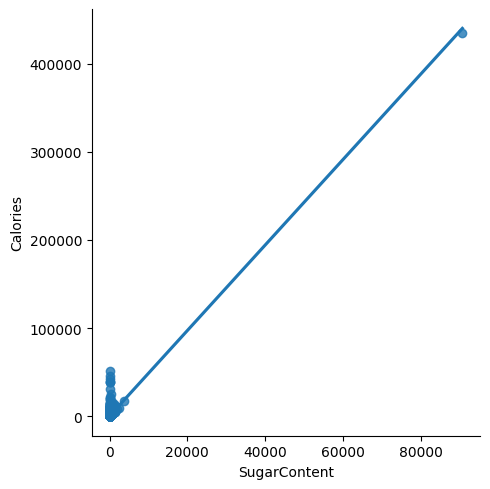

In [21]:
# Exploring how SugarContent relates to Calrories
sns.lmplot(x="SugarContent", y="Calories", data=df, fit_reg=True, ci=None)

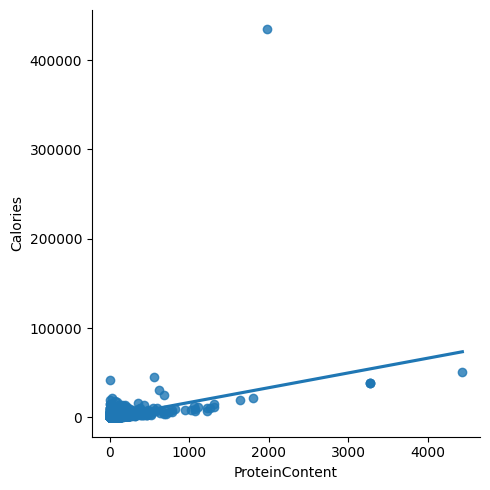

In [22]:
# Exploring how ProteinContent relates to Calrories
sns.lmplot(x="ProteinContent", y="Calories", data=df, fit_reg=True, ci=None)

**Calculating the Correlation Coefficient**


In [23]:
# Extract the preparation time and calories columns from the DataFrame
Total_time_list = df['TotalTime']
calories_list = df['Calories']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Total_time_list, calories_list)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson Correlation Coefficient: -0.00
P-value: 0.62


In [24]:
# Extract the preparation time and calories columns from the DataFrame
PrepTime_list = df['PrepTime']
calories_list = df['Calories']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(PrepTime_list, calories_list)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson Correlation Coefficient: 0.01
P-value: 0.00


In [25]:
# Extract the preparation time and calories columns from the DataFrame
CookTime_list = df['CookTime']
calories_list = df['Calories']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(CookTime_list, calories_list)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson Correlation Coefficient: -0.00
P-value: 0.69


**HeatMap for the variables**

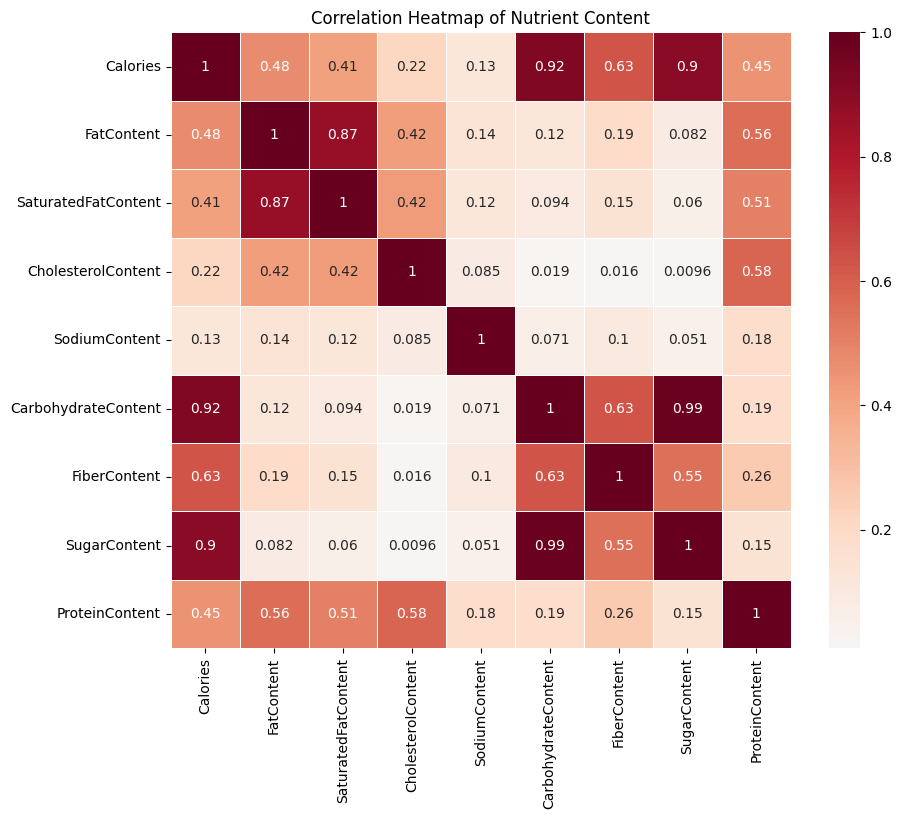

In [27]:
# Select the nutrient-related columns for the heatmap
nutrient_columns = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
                    'ProteinContent']

# Calculate the correlation matrix
correlation_matrix = df[nutrient_columns].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'RdBu_r', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Nutrient Content')
plt.show()


**Feature Extraction and Transformation:**

Next, the relevant features for the food recommendation system were extracted. For the Nearest Neighbors algorithm, columns related to food contents ('FatContent', 'SaturatedFatContent', 'CholesterolContent',''PrepTime', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent') as features. For Naive Bayes, we consider 'Calories' as the target variable.

In [28]:
calorie_limit = 400
low_calories_data = df[df['Calories'] < calorie_limit]
low_calories_data

,RecipeId,Barcode,Name,CookTime,PrepTime,TotalTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,DatePublished,RecipeInstructions,Images
0,38,38,Low-Fat Berry Blue Frozen Dessert,1440.0,2700.0,1440.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4,1999-08-09 21:46:00+00:00,"cToss 2 cups berries with sugar., Let stand fo...",chttps://img.sndimg.com/food/image/upload/w_55...
2,40,40,Best Lemonade,300.0,1800.0,2100.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4,1999-09-05 19:52:00+00:00,"cInto a 1 quart Jar with tight fitting lid, pu...",chttps://img.sndimg.com/food/image/upload/w_55...
4,42,42,Cabbage Soup,1800.0,1200.0,3000.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4,1999-09-19 06:19:00+00:00,"cMix everything together and bring to a boil.,...",https://img.sndimg.com/food/image/upload/w_555...
7,45,45,Buttermilk Pie With Gingersnap Crumb Crust,3000.0,1800.0,60.0,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,8,1999-08-06 00:40:00+00:00,"cPreheat oven to 350°F., Make pie crust, using...",https://img.sndimg.com/food/image/upload/w_555...
13,51,51,Chai Tea,1500.0,900.0,2400.0,69.2,3.8,2.1,12.8,53.2,6.0,0.7,0.0,3.5,4,1999-08-16 05:10:00+00:00,"cBring water and spices to boil in saucepan., ...",character0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522545,541361,541361,Cookie Cutter Shortbread Hearts,900.0,900.0,1800.0,124.2,7.9,4.9,16.4,55.4,13.0,0.6,6.0,1.2,30,2020-12-21 16:11:00+00:00,cPreheat oven to 325°. Line cookie sheets with...,character0
522550,541366,541366,Orange Creamsicle Moonshine,1800.0,300.0,2100.0,273.2,0.7,0.1,0.0,3.8,59.7,0.7,53.0,2.3,12,2020-12-21 16:24:00+00:00,"cUsing a large stock pot, bring to a boil the ...",character0
522554,541370,541370,Minty Whipped Shortbread Cookies,720.0,900.0,1620.0,62.5,4.4,2.8,10.5,35.5,5.3,0.1,2.3,0.6,48,2020-12-21 16:30:00+00:00,cPreheat oven to 325°F and line two large cook...,https://img.sndimg.com/food/image/upload/w_555...
522561,541377,541377,Slow-Cooker Classic Coffee Cake,180.0,1200.0,180.0,358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,12,2020-12-22 15:12:00+00:00,cLine bottom and sides of 5-quart oval slow co...,character0


**Encoding Variables**

In [29]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
calories_encoded = label_encoder.fit_transform(low_calories_data['Calories'])

In [30]:
# Feature extraction
features = low_calories_data[['FatContent', 'SaturatedFatContent', 'CholesterolContent',
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                 'SugarContent', 'ProteinContent']]

# Target variable
target = calories_encoded

**Algorithm Selection and Model Training:**

KNeighborsRegressor from scikit-learn was selected and used for the KNN algorithm and GaussianNB for Naive Bayes and Linear Regression.

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Nearest Neighbors model
nn_model = KNeighborsRegressor(n_neighbors=5)
nn_model.fit(X_train, y_train)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(features, target)

#Linear Regression
lr_model = LinearRegression() ## Mainly Used for evaluation
lr_model.fit(X_train, y_train)



LinearRegression()

**Food Recommendation:**
The function to store the captured bardcode is defined. The value is used to find the closest recipe based on food contents using the Nearest Neighbour model after which LR and NB is used to suggest a similar food with fewer calories.

**Testing:**
The recommender system model is tested

In [37]:
def food_recommendation(barcode):
    try:
        # Find the nearest neighbors based on food contents
        barcode_data = df[df['Barcode'] == barcode][['FatContent', 'SaturatedFatContent',
                                                     'CholesterolContent', 'SodiumContent',
                                                     'CarbohydrateContent', 'FiberContent',
                                                     'SugarContent', 'ProteinContent']]

        k = 5
        nn_recipe_idxs = nn_model.kneighbors(barcode_data, n_neighbors=k, return_distance=False)[0]

        # Get the recommended recipe based on Nearest Neighbors
        nn_recipes = [df.iloc[nn_recipe_idx]['Name'] for nn_recipe_idx in nn_recipe_idxs]

        # Use Naive Bayes to find a similar recipe with fewer calories
        similar_food_idx = nb_model.predict(barcode_data)[0]
        similar_food = df.iloc[similar_food_idx]['Name']

        # Use Linear Regression to predict calories
        predicted_calories_lr = lr_model.predict(barcode_data)[0]

        # Find recipes with calories closest to the predicted value
        calorie_difference = abs(df['Calories'] - predicted_calories_lr)
        closest_recipe_idx = calorie_difference.idxmin()
        suggested_recipe_lr = df.loc[closest_recipe_idx]['Name']

    except:
        nn_recipes = 'Food Data Not Found'
        similar_food = 'Food Data Not Found'
        suggested_recipe_lr = 'Food Data Not Found'

    return nn_recipes, similar_food, suggested_recipe_lr


In [38]:
nn_recipes, similar_food, similar_food_lr = food_recommendation(41)
print(f"Nearest Neighbors Recommended Recipes: {nn_recipes}")
print(f"Naive Bayes Recommended Recipe (with fewer calories): {similar_food}")
print(f"Linear Regression Recommended Recipe (with fewer calories): {similar_food_lr}")

Nearest Neighbors Recommended Recipes: ['Herb Infused Grilled Artichokes W/Mustard Aioli', 'Mini Pumpkin Pies', 'Thai Tenderloins', 'Baked Cream Cheese Appetizer', 'Lemon Barbecued Red Snapper']
Naive Bayes Recommended Recipe (with fewer calories): Chicken and Prawn Kebabs
Linear Regression Recommended Recipe (with fewer calories): Tony Chachere" Long Island Duck


**Performance Evaluation:**

To evaluate the models' performance, R-squared score was calculated for the KNN and LR algorithm and for accuracy, precision, recall, and F1-score for the Naive Bayes algorithm.

**Naive Bayes Evaluation**

In [39]:
# Evaluation
# Nearest Neighbors evaluation
nn_r2_score = r2_score(y_test, nn_model.predict(X_test))

# Naive Bayes evaluation
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1_score = f1_score(y_test, nb_pred, average='weighted')

#print(f"Nearest Neighbors R-squared Score: {nn_r2_score:.2f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes Precision: {nb_precision:.2f}")
print(f"Naive Bayes Recall: {nb_recall:.2f}")
print(f"Naive Bayes F1 Score: {nb_f1_score:.2f}")

Naive Bayes Accuracy: 0.01
Naive Bayes Precision: 0.01
Naive Bayes Recall: 0.01
Naive Bayes F1 Score: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Evaluating K-Nearest Neighbour and Logistic Regression**

Calculating the R-squared, MAE and RMSE Values for the two Algorithms



In [40]:
# Evaluate Nearest Neighbors model
nn_predictions = nn_model.predict(X_test)

nn_r2 = r2_score(y_test, nn_predictions)

print(f"Nearest Neighbors R-squared Score: {nn_r2}")

# Evaluate Linear Regression model
lr_predictions = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression R-squared Score: {lr_r2}")


Nearest Neighbors R-squared Score: 0.9346660725977719
Linear Regression R-squared Score: 0.9856345516836625


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for Nearest Neighbors (KNN)
nn_predictions = nn_model.predict(X_test)

nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)

print(f"Nearest Neighbors MAE: {nn_mae}")
print(f"Nearest Neighbors RMSE: {nn_rmse}")

# Calculate MAE and RMSE for Linear Regression (LR)
lr_predictions = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression RMSE: {lr_rmse}")

Nearest Neighbors MAE: 177.9531389475372
Nearest Neighbors RMSE: 260.59765124314663
Linear Regression MAE: 48.82344810181859
Linear Regression RMSE: 122.19704569971907


**Visualisation of the results of K-nearest Neighbour and Logistic Regression**


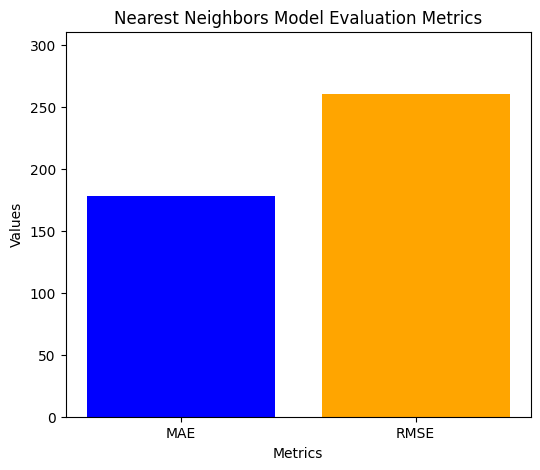

In [ ]:
# Metrics and their values
metrics = ['MAE', 'RMSE']
nn_values = [177.95, 260.60]

# Define colors for the bars
colors = ['blue', 'orange']

# Create a bar chart
plt.figure(figsize=(6, 5))
plt.bar(metrics, nn_values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Nearest Neighbors Model Evaluation Metrics')
plt.ylim(0, max(nn_values) + 50)  # Adjust the y-axis limit
plt.show()

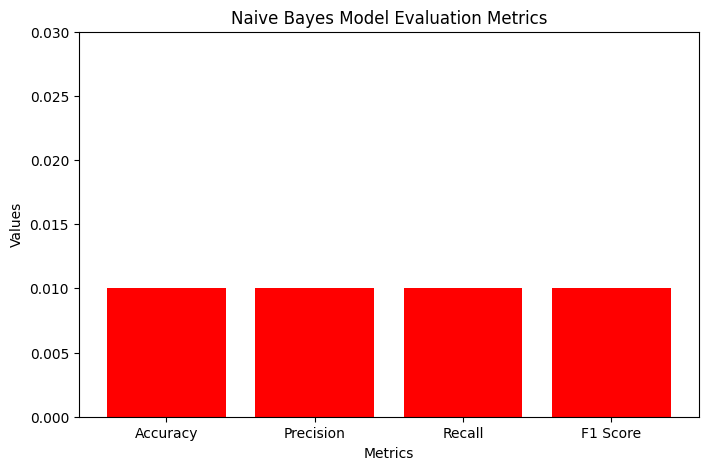

In [ ]:
# Metrics and their values for Naive Bayes
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_values = [0.01, 0.01, 0.01, 0.01]

# Create a bar chart
plt.figure(figsize=(8, 5))  # Adjust the figsize if needed
plt.bar(metrics, nb_values, color='red')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Naive Bayes Model Evaluation Metrics')
plt.ylim(0, max(nb_values) + 0.02)  # Adjust the y-axis limit
plt.show()


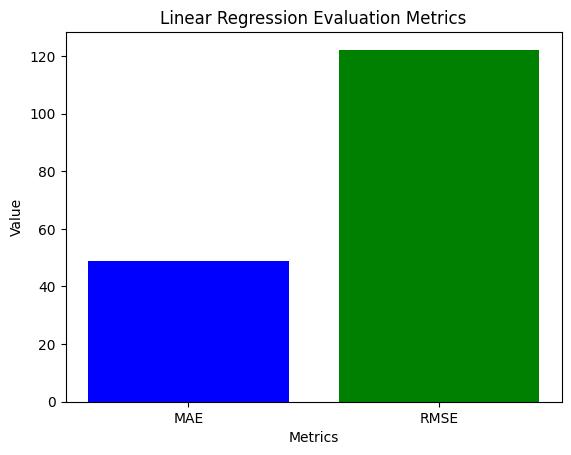

In [ ]:
# Metrics
metrics = ['MAE', 'RMSE']
values = [48.82344810181859, 122.19704569971907]

# Create a bar chart
plt.bar(metrics, values, color=['blue', 'Green'])

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Linear Regression Evaluation Metrics')

# Display the plot
plt.show()